In [27]:
import numpy as np

In [28]:
from dataloader import DataLoader

df = DataLoader(file_name='Iris.csv').data
print(df.shape)
df.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [29]:
def calculate_euclidian_dis(point1: np.ndarray, point2: np.ndarray) -> float:
    """
    Method for calculating the eucledian distance between two given vectors.
    :param np.ndarray point1: The first vector given as a numpy array.
    :param np.ndarray point2: The second vector given as a numpy array.
    :return float: The eucledian distance between the two vectors.
    """
    u2 = np.sum(point1 ** 2, axis=1).reshape((point1, 1))
    v2 = np.sum(point2 ** 2, axis=1)
    uv = point1 @ point2.T
    # the @ means matrix multiplication
    result = np.sqrt(u2 - 2 * uv + v2)
    return result

def update_radius(initial_radius: float, i: int, time_const: float) -> float:
    """
    Calculates the radius for the current period, based on the current iteration number,
    the time constant and the initial value of the radius given by the user.
    :param float initial_radius: The initial value of the radius given by the user.
    :param int i: The number of epochs already completed by the training.
    :param float time_const: The time constant given by the user.
    :return: Returns with the updated radius value.
    """
    return initial_radius * np.exp(-i / time_const)

def update_learning_rate(initial_learning_rate: float, i: int, n_iterations: int) -> float:
    """
    Updates the learning rate for the current period, based on the initial learning rate,
    the current iteration number and the total number of iterations.
    :param float initial_learning_rate: The initial value of the learning rate given by the user.
    :param int i: The number of epochs already completed by the training.
    :param int n_iterations: The total number of iterations, the model will run.
    :return: Returns with the updated learning rate value.
    """
    return initial_learning_rate * np.exp(-i / n_iterations)

def neighbourhood_function(bmu_location: np.ndarray, selected_node_location: np.ndarray, radius: float) -> float:
    """
    Neighbourhood function to calculate influence from best matching unit and selected node.
    :param np.ndarray bmu_location: The coordinates of the bmu's position on the grid.
    :param np.ndarray selected_node_location: The coordinates of the selected node's position.
    :param float radius: The current value of the radius.
    :return float: The influence of the distance from the bmu on the learning of the node.
    """
    euclidien_dist_to_bmu = calculate_euclidian_dis(bmu_location, selected_node_location)
    return np.exp(-euclidien_dist_to_bmu / (2 * (radius ** 2)))

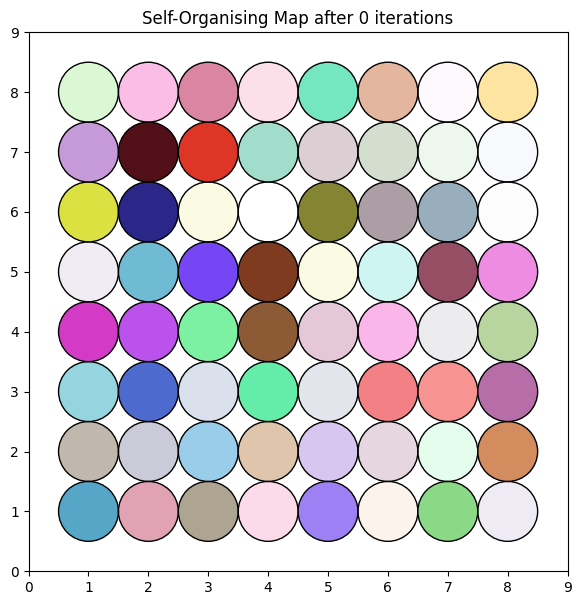

In [30]:
from som import Grid

som_width = 8
som_length = 8
dimension = 4
grid = Grid(width=som_width, length=som_length, dim=dimension)
grid.visualize_grid(epochs=0)

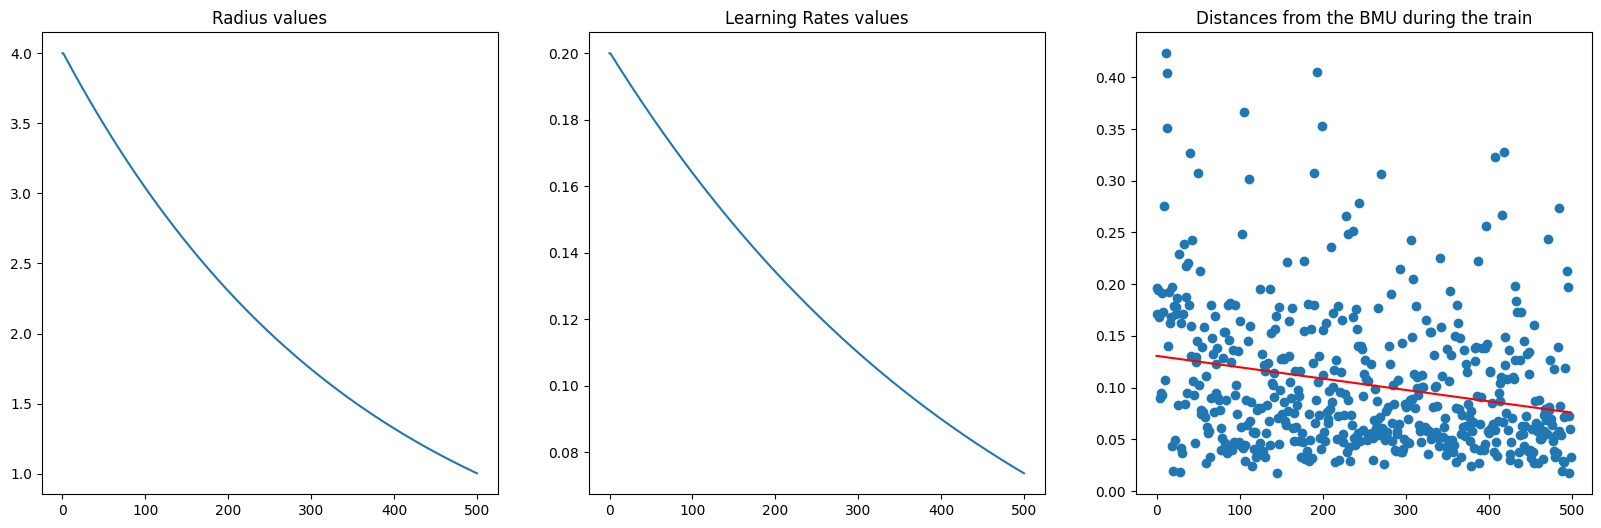

In [31]:
learning_rate_0 = 0.2
iterations = 500
grid.train_som(training_sample=df.iloc[:, :4], learn_rate=learning_rate_0, epochs=iterations)

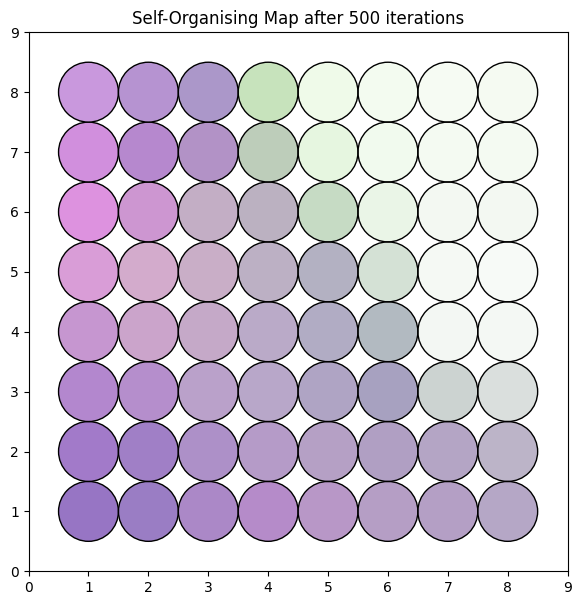

In [32]:
grid.visualize_grid(epochs=iterations)

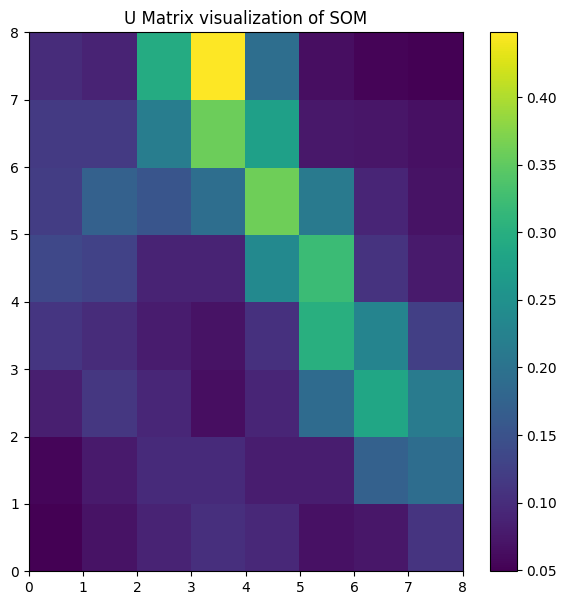

In [33]:
grid.create_u_matrix()

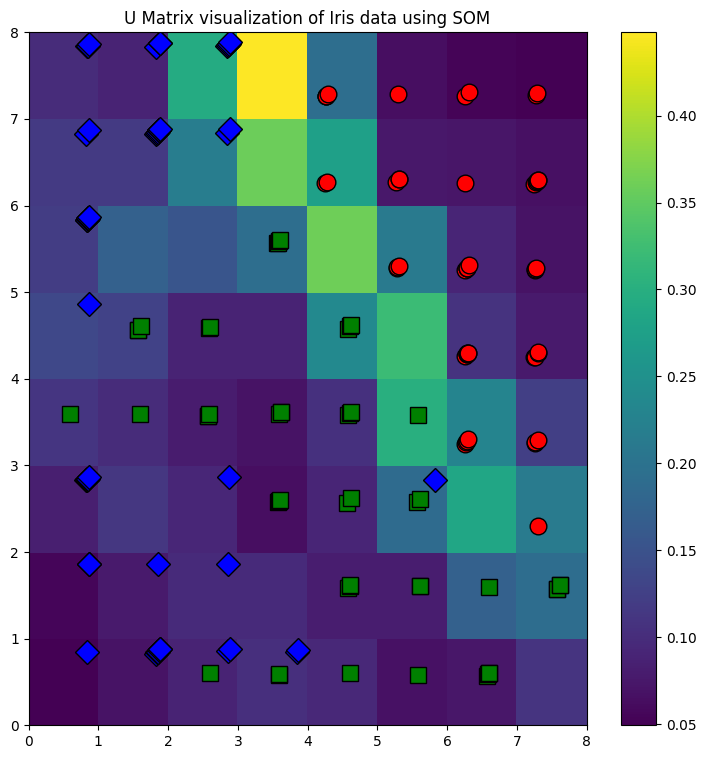

In [34]:
grid.visualize_flowers(data=df)